In [1]:
#!pip install xgboost
#!pip install catboost
#!pip install lightgbm

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split as tts

train_csv=pd.read_csv("../data/outcomes_models/train_mod_numeric.csv")

In [3]:
from sklearn.ensemble import GradientBoostingRegressor as GBR

from xgboost import XGBRegressor as XGBR

from sklearn.ensemble import RandomForestRegressor as RFR  

from catboost import CatBoostRegressor as CTR

rfr=RFR() #random forest
gbr=GBR()
xgbr=XGBR()
ctr=CTR()

In [4]:
X=train_csv.drop(['price'], axis=1)   # separacion X, y

y=train_csv.price  

In [5]:
# Vamos a separar train_csv en 80% datos para train y 20% datos para testear

X_train, X_test, y_train, y_test=tts(X, y)

In [6]:
#random forest

rfr.fit(X_train, y_train)

RandomForestRegressor()

In [7]:
# boosting

gbr.fit(X_train, y_train)

GradientBoostingRegressor()

In [8]:
xgbr.fit(X_train, y_train)


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [9]:
ctr.fit(X_train, y_train, verbose=0)

## Evaluación

In [10]:
from sklearn.metrics import mean_squared_error as mse  # error cuadratico medio

In [11]:
y_pred=rfr.predict(X_test)
mse(y_test, y_pred, squared=False)


151.861715685932

In [12]:
y_pred=gbr.predict(X_test)

mse(y_test, y_pred, squared=False)  # RMSE

142.75625795998926

In [13]:
y_pred=xgbr.predict(X_test)

mse(y_test, y_pred, squared=False)  # RMSE

176.95359463698753

In [14]:
y_pred=ctr.predict(X_test)

mse(y_test, y_pred, squared=False)  # RMSE

118.0917914815961

# Repetimos normalizando

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
X=train_csv.drop(['price'], axis=1)   # separacion X, y

y=train_csv.price  

In [17]:
train_csv_norm=pd.DataFrame(StandardScaler().fit_transform(X),  # standardize numeric columns
                      columns=X.columns)

In [18]:
X_train, X_test, y_train, y_test=tts(train_csv_norm, y)

In [19]:
gbr.fit(X_train, y_train)
xgbr.fit(X_train, y_train)
ctr.fit(X_train, y_train, verbose=0)

In [20]:
y_pred=gbr.predict(X_test)

mse(y_test, y_pred, squared=False) 

114.3902247548695

In [21]:
y_pred=xgbr.predict(X_test)

mse(y_test, y_pred, squared=False)

163.70589779841094

In [22]:
y_pred=ctr.predict(X_test)

mse(y_test, y_pred, squared=False)

105.13285021209344

In [23]:
y_pred

array([ 58.14270425, 184.39170413, 189.60559887, ..., 280.82308585,
       161.96269445, 146.94434348])

# Quitamos correlaciones


In [24]:
import pylab as plt
import seaborn as sns

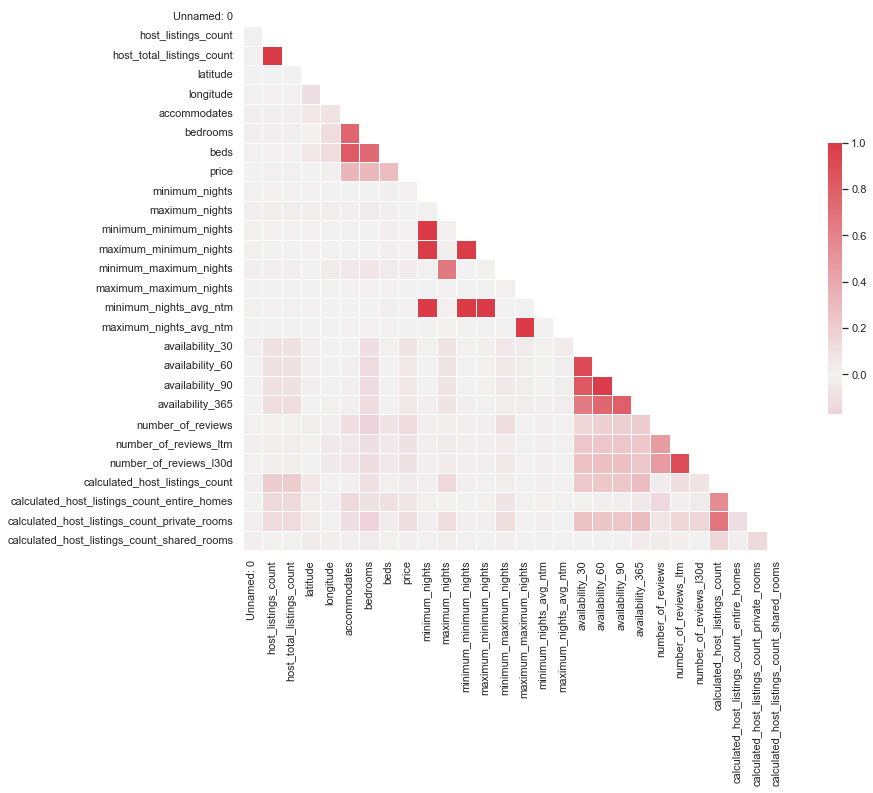

In [25]:
plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(train_csv.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(train_csv.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});


In [26]:
#quitamos las filas con menos correlacion

columns_corr=['minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm']

In [27]:
train_csv_new=train_csv.drop(columns=columns_corr,axis=1)

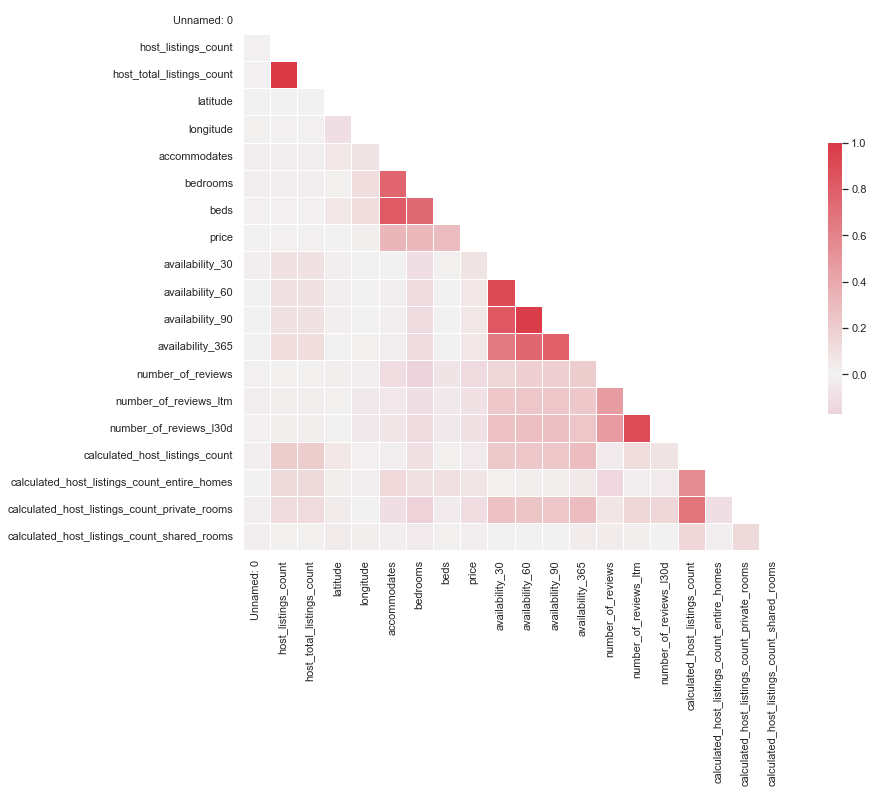

In [28]:
plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(train_csv_new.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(train_csv_new.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

# Volvemos a probar

In [29]:
X=train_csv_new.drop(['price'], axis=1)   # separacion X, y

y=train_csv_new.price  

In [30]:
X_train, X_test, y_train, y_test=tts(X, y)

In [31]:
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

In [32]:
xgbr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [33]:
ctr.fit(X_train, y_train, verbose=0)

In [34]:
y_pred=gbr.predict(X_test)

mse(y_test, y_pred, squared=False) 

139.72502116019052

In [35]:
y_pred=xgbr.predict(X_test)

mse(y_test, y_pred, squared=False)

123.87455929755164

In [36]:
y_pred=ctr.predict(X_test)

mse(y_test, y_pred, squared=False)

104.72406218548386

## Elegimos modelo

En este punto el modelo que mejor ha funcionado es de los modelos iniciales el ctr con un RMSE de 79

## Entrenamos modelo con todos los datos

In [37]:
X=train_csv.drop(['price'], axis=1)   # separacion X, y

y=train_csv.price  

In [38]:
gbr.fit(X, y)

GradientBoostingRegressor()

In [39]:
xgbr.fit(X, y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [40]:
# boosting

ctr.fit(X, y, verbose=0)

## Importamos el test con loas datos limpios

In [41]:
test_csv1=pd.read_csv("../data/outcomes_models/test_mod_numeric.csv")
test_csv2=pd.read_csv("../data/outcomes_models/test_mod_numeric.csv")
test_csv3=pd.read_csv("../data/outcomes_models/test_mod_numeric.csv")
test_csv4=pd.read_csv("../data/outcomes_models/test_mod_numeric.csv")

In [42]:
y_pred1=gbr.predict(test_csv1)
y_pred2=xgbr.predict(test_csv2)
y_pred3=ctr.predict(test_csv3)
y_pred4=rfr.predict(test_csv4)

In [43]:
test_csv1["price"]=y_pred1
test_csv2["price"]=y_pred2
test_csv3["price"]=y_pred3
test_csv4["price"]=y_pred4

In [44]:
sample_final1=test_csv1[["price","Unnamed: 0"]]
sample_final2=test_csv2[["price","Unnamed: 0"]]
sample_final3=test_csv3[["price","Unnamed: 0"]]
sample_final4=test_csv4[["price","Unnamed: 0"]]

In [45]:
sample_final1.head()

,price,Unnamed: 0
0,69.043401,0
1,101.062137,1
2,127.832632,2
3,121.849358,3
4,131.472608,4


In [46]:
sample_final1.rename(columns={"Unnamed: 0": "id"},inplace=True)
sample_final2.rename(columns={"Unnamed: 0": "id"},inplace=True)
sample_final3.rename(columns={"Unnamed: 0": "id"},inplace=True)
sample_final4.rename(columns={"Unnamed: 0": "id"},inplace=True)

/var/folders/tr/7ry1klqj22sglvfj6nq3g5kw0000gn/T/ipykernel_61315/1352245076.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_final1.rename(columns={"Unnamed: 0": "id"},inplace=True)
/var/folders/tr/7ry1klqj22sglvfj6nq3g5kw0000gn/T/ipykernel_61315/1352245076.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_final2.rename(columns={"Unnamed: 0": "id"},inplace=True)
/var/folders/tr/7ry1klqj22sglvfj6nq3g5kw0000gn/T/ipykernel_61315/1352245076.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pand

In [50]:
sample_final1.to_csv("../data/sample_final1.csv", index=False)
sample_final2.to_csv("../data/sample_final2.csv", index=False)
sample_final3.to_csv("../data/sample_final3.csv", index=False)
sample_final4.to_csv("../data/sample_final4.csv", index=False)